# Projet 3: Concevez une application au service de la santé publique

#  - NETTOYAGE NOTEBOOK 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns 
pd.options.display.max_colwidth = None
pd.set_option('display.float_format', lambda x: '%.1f' %x)
pd.set_option('display.max_columns', None)
sns.set(font_scale=1)
from sklearn.impute import SimpleImputer
from datetime import datetime
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn import neighbors

# Projet d'Application: 

Étant donné que j'aime le sport et j’en pratique énormément, il sera plus facile pour moi de comprendre les produits qui sont apte pour le sport, ainsi programmer une application qui permettra aux consommateurs qui cherchent à optimiser sa qualité nutritionnelle pourra le faire.

- Objectifs de l’application :

Le but de cette application, consiste à savoir le grade moyen des produits achetés.

Par exemple : si j’ai acheté 10 produits, j’aurais un niveau de nutri-grades moyen (de A à E) pour les 10 produits achetés, est cela indiquera si oui ou non cela est bon pour notre corps.

In [2]:
data3 = pd.read_csv("fr.openfoodfacts.org.products.csv", sep='\t', low_memory= False )
data3

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000000003087/farine-de-ble-noir-ferme-t-y-r-nao,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-completed, en:packaging-to-be-completed, en:quantity-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded","A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,

In [3]:
data3.shape

(320772, 162)

In [4]:
data3.duplicated().sum()

0

# Nettoyer les données:

- En mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées.

- En identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.

# 1ère fonction % de NAN

Pour voir si notre ensemble de données est complet et pour voir à combien de pourcent les colonnes des tableau sont remplie de NAN, pour cela on procède à une fonction qu'on défini. 

Avec comme variable le nom du tableau et le nom de toute les colonnes et nombre de lignes. 

Pour trouver les valeurs null on fais nombre de ligne - nombre des colonnes. On retourne la valeur, pour pouvoir la refaire sur toute les colonnes, on fais une boucle for avec i comme itération qui affichera le nom de la colonnes. 

Plus le pourcentages des colonnes est proche ou égal à 0%, plus les colonnes sont renseignée et donc moins de valeur de NAN

In [5]:
”def NaN_percent(data3, column_name):
    row_count = data3[column_name].shape[0]                
    empty_values = row_count - data3[column_name].count() 
    return (100.0*empty_values)/row_count               
for i in list(data3):                                     
    print(i +': ' + str(NaN_percent(data3,i))+'% des colonnes sont vides')

code: 0.007170201887945332% des colonnes sont vides
url: 0.007170201887945332% des colonnes sont vides
creator: 0.0006234958163430723% des colonnes sont vides
created_t: 0.0009352437245146085% des colonnes sont vides
created_datetime: 0.0028057311735438257% des colonnes sont vides
last_modified_t: 0.0% des colonnes sont vides
last_modified_datetime: 0.0% des colonnes sont vides
product_name: 5.537266344942825% des colonnes sont vides
generic_name: 83.54126918808375% des colonnes sont vides
quantity: 67.32289601336775% des colonnes sont vides
packaging: 75.3843851707755% des colonnes sont vides
packaging_tags: 75.38407342286733% des colonnes sont vides
brands: 8.857381566969686% des colonnes sont vides
brands_tags: 8.859875550235058% des colonnes sont vides
categories: 73.68535907124063% des colonnes sont vides
categories_tags: 73.69190577731223% des colonnes sont vides
categories_fr: 73.68504732333245% des colonnes sont vides
origins: 93.08231391767362% des colonnes sont vides
origins_

# 2ème méthode isnull()

In [6]:
data3.isnull()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,False,False,False,False,False,False,False,False,True,False,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,True,True,False,True,False,False,True,True,False,True,True,False,True,True,True,False,True,True,False,False,False,True,True,True,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,True,True,True,

In [7]:
data3.isnull().sum()

code                           23
url                            23
creator                         2
created_t                       3
created_datetime                9
                            ...  
carbon-footprint_100g      320504
nutrition-score-fr_100g     99562
nutrition-score-uk_100g     99562
glycemic-index_100g        320772
water-hardness_100g        320772
Length: 162, dtype: int64

In [8]:
data3.isnull().sum().sum()

39608589

In [9]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


In [10]:
data3.describe()

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,248939.0,248939.0,0.0,248939.0,0.0,0.0,261113.0,857.0,243891.0,229554.0,0.0,0.0,1.0,2.0,4.0,1.0,1.0,1.0,24.0,23.0,0.0,0.0,1.0,0.0,22823.0,22859.0,841.0,186.0,38.0,78.0,188.0,149.0,8.0,24.0,23.0,21.0,13.0,0.0,14.0,0.0,0.0,0.0,143298.0,144090.0,243588.0,244971.0,72.0,26.0,38.0,262.0,4.0,11.0,266.0,414.0,200886.0,259922.0,27.0,16.0,9.0,255510.0,255463.0,4133.0,137554.0,34.0,7057.0,1340.0,918.0,140867.0,11154.0,10815.0,11729.0,6784.0,5240.0,3042.0,5300.0,330.0,2483.0,38.0,81.0,24748.0,158.0,141050.0,5845.0,140462.0,6253.0,3929.0,2106.0,1620.0,79.0,1168.0,20.0,11.0,259.0,78.0,29.0,49.0,3036.0,165.0,948.0,0.0,268.0,221210.0,221210.0,0.0,0.0
mean,NaN,1.9,0.0,NaN,0.1,NaN,NaN,1141.9,585.5,12.7,5.1,NaN,NaN,7.4,6.0,36.1,18.9,8.1,3.0,10.8,10.7,NaN,NaN,61.0,NaN,10.4,6.3,3.2,2.3,3.2,1.6,16.2,3.8,0.1,0.2,0.1,40.2,25.1,NaN,0.0,NaN,NaN,NaN,0.1,0.0,32.1,16.0,11.8,2.9,25.9,6.4,24.3,12.2,31.9,49.8,2.9,7.1,4.7,2.5,0.0,2.0,0.8,7.8,0.0,0.5,0.0,0.1,0.0,0.0,0.3,0.3,0.0,0.0,0.0,0.2,0.0,0.1,0.1,0.0,0.1,0.4,0.1,0.1,0.6,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.6,0.1,6.4,31.5,15.4,49.5,NaN,341.7,9.2,9.1,NaN,NaN
std,NaN,2.5,0.1,NaN,0.3,NaN,NaN,6447.2,712.8,17.6,8.0,NaN,NaN,NaN,0.2,24.1,NaN,NaN,NaN,4.0,3.4,NaN,NaN,NaN,NaN,17.1,10.8,5.6,8.0,13.9,2.0,17.5,6.5,0.0,0.0,0.0,25.2,26.0,NaN,0.0,NaN,NaN,NaN,1.5,0.4,29.7,22.3,14.0,6.3,30.0,14.4,17.8,8.4,24.7,33.2,12.9,8.4,3.0,2.2,0.0,128.3,50.5,11.0,0.1,2.6,0.0,0.7,1.0,2.2,2.5,1.3,0.3,1.2,0.3,5.1,0.0,0.7,1.5,0.0,0.2,12.5,0.1,3.3,12.1,0.2,13.5,0.1,0.9,0.0,0.1,0.1,0.0,0.0,0.0,6.5,0.2,2.0,32.0,3.8,18.8,NaN,425.2,9.1,9.2,NaN,NaN
min,NaN,0.0,0.0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,7.4,5.9,0.0,18.9,8.1,3.0,0.1,5.2,NaN,NaN,61.0,NaN,0.0,0.0,0.0,0.0,0.1,0.0,0.1,0.1,0.0,0.1,0.0,1.0,1.1,NaN,0.0,NaN,NaN,NaN,-3.6,0.0,0.0,-17.9,0.0,0.0,0.0,0.0,0.1,1.5,0.0,0.0,-6.7,-800.0,0.9,0.3,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,-6.9,0.0,0.0,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,6.0,NaN,0.0,-15.0,-15.0,NaN,NaN
25%,NaN,0.0,0.0,NaN,0.0,NaN,NaN,377.0,49.4,0.0,0.0,NaN,NaN,7.4,6.0,34.7,18.9,8.1,3.0,7.3,7.1,NaN,NaN,61.0,NaN,0.0,0.0,0.6,0.1,0

In [11]:
# ici je fais un Ratio de valeurs nulls pour chaque colonnes et cela permettra de pouvoir procéder à un seuil
def ratio_NAN( data3 ):
    return pd.DataFrame( data3.isnull().sum()/len(data3)).transpose()

In [12]:
ratioNAN = ratio_NAN( data3 )

In [13]:
ratioNAN

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.8,0.7,0.8,0.8,0.1,0.1,0.7,0.7,0.7,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,0.9,1.0,0.9,0.8,0.8,0.0,0.0,0.0,0.2,0.9,1.0,0.9,0.9,0.9,0.3,1.0,0.2,0.2,0.5,0.5,0.2,1.0,1.0,0.2,1.0,1.0,1.0,0.3,0.7,0.7,0.0,0.0,0.0,0.7,0.7,0.8,0.8,0.2,1.0,0.2,0.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,0.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.6,0.6,0.2,0.2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.4,0.2,1.0,1.0,1.0,0.2,0.2,1.0,0.6,1.0,1.0,1.0,1.0,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.9,1.0,0.6,1.0,0.6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.3,0.3,1.0,1.0


In [14]:
def barplotsNAN( data3 ):
    txn = ratio_NAN( data3 )
    
    fig,ax = plt.subplots(figsize = (30,20))
    sns.barplot(data = txn)
    ax.tick_params(axis = "x", rotation = 100)
    plt.title('Taux de valeurs manquantes')
    plt.show() 

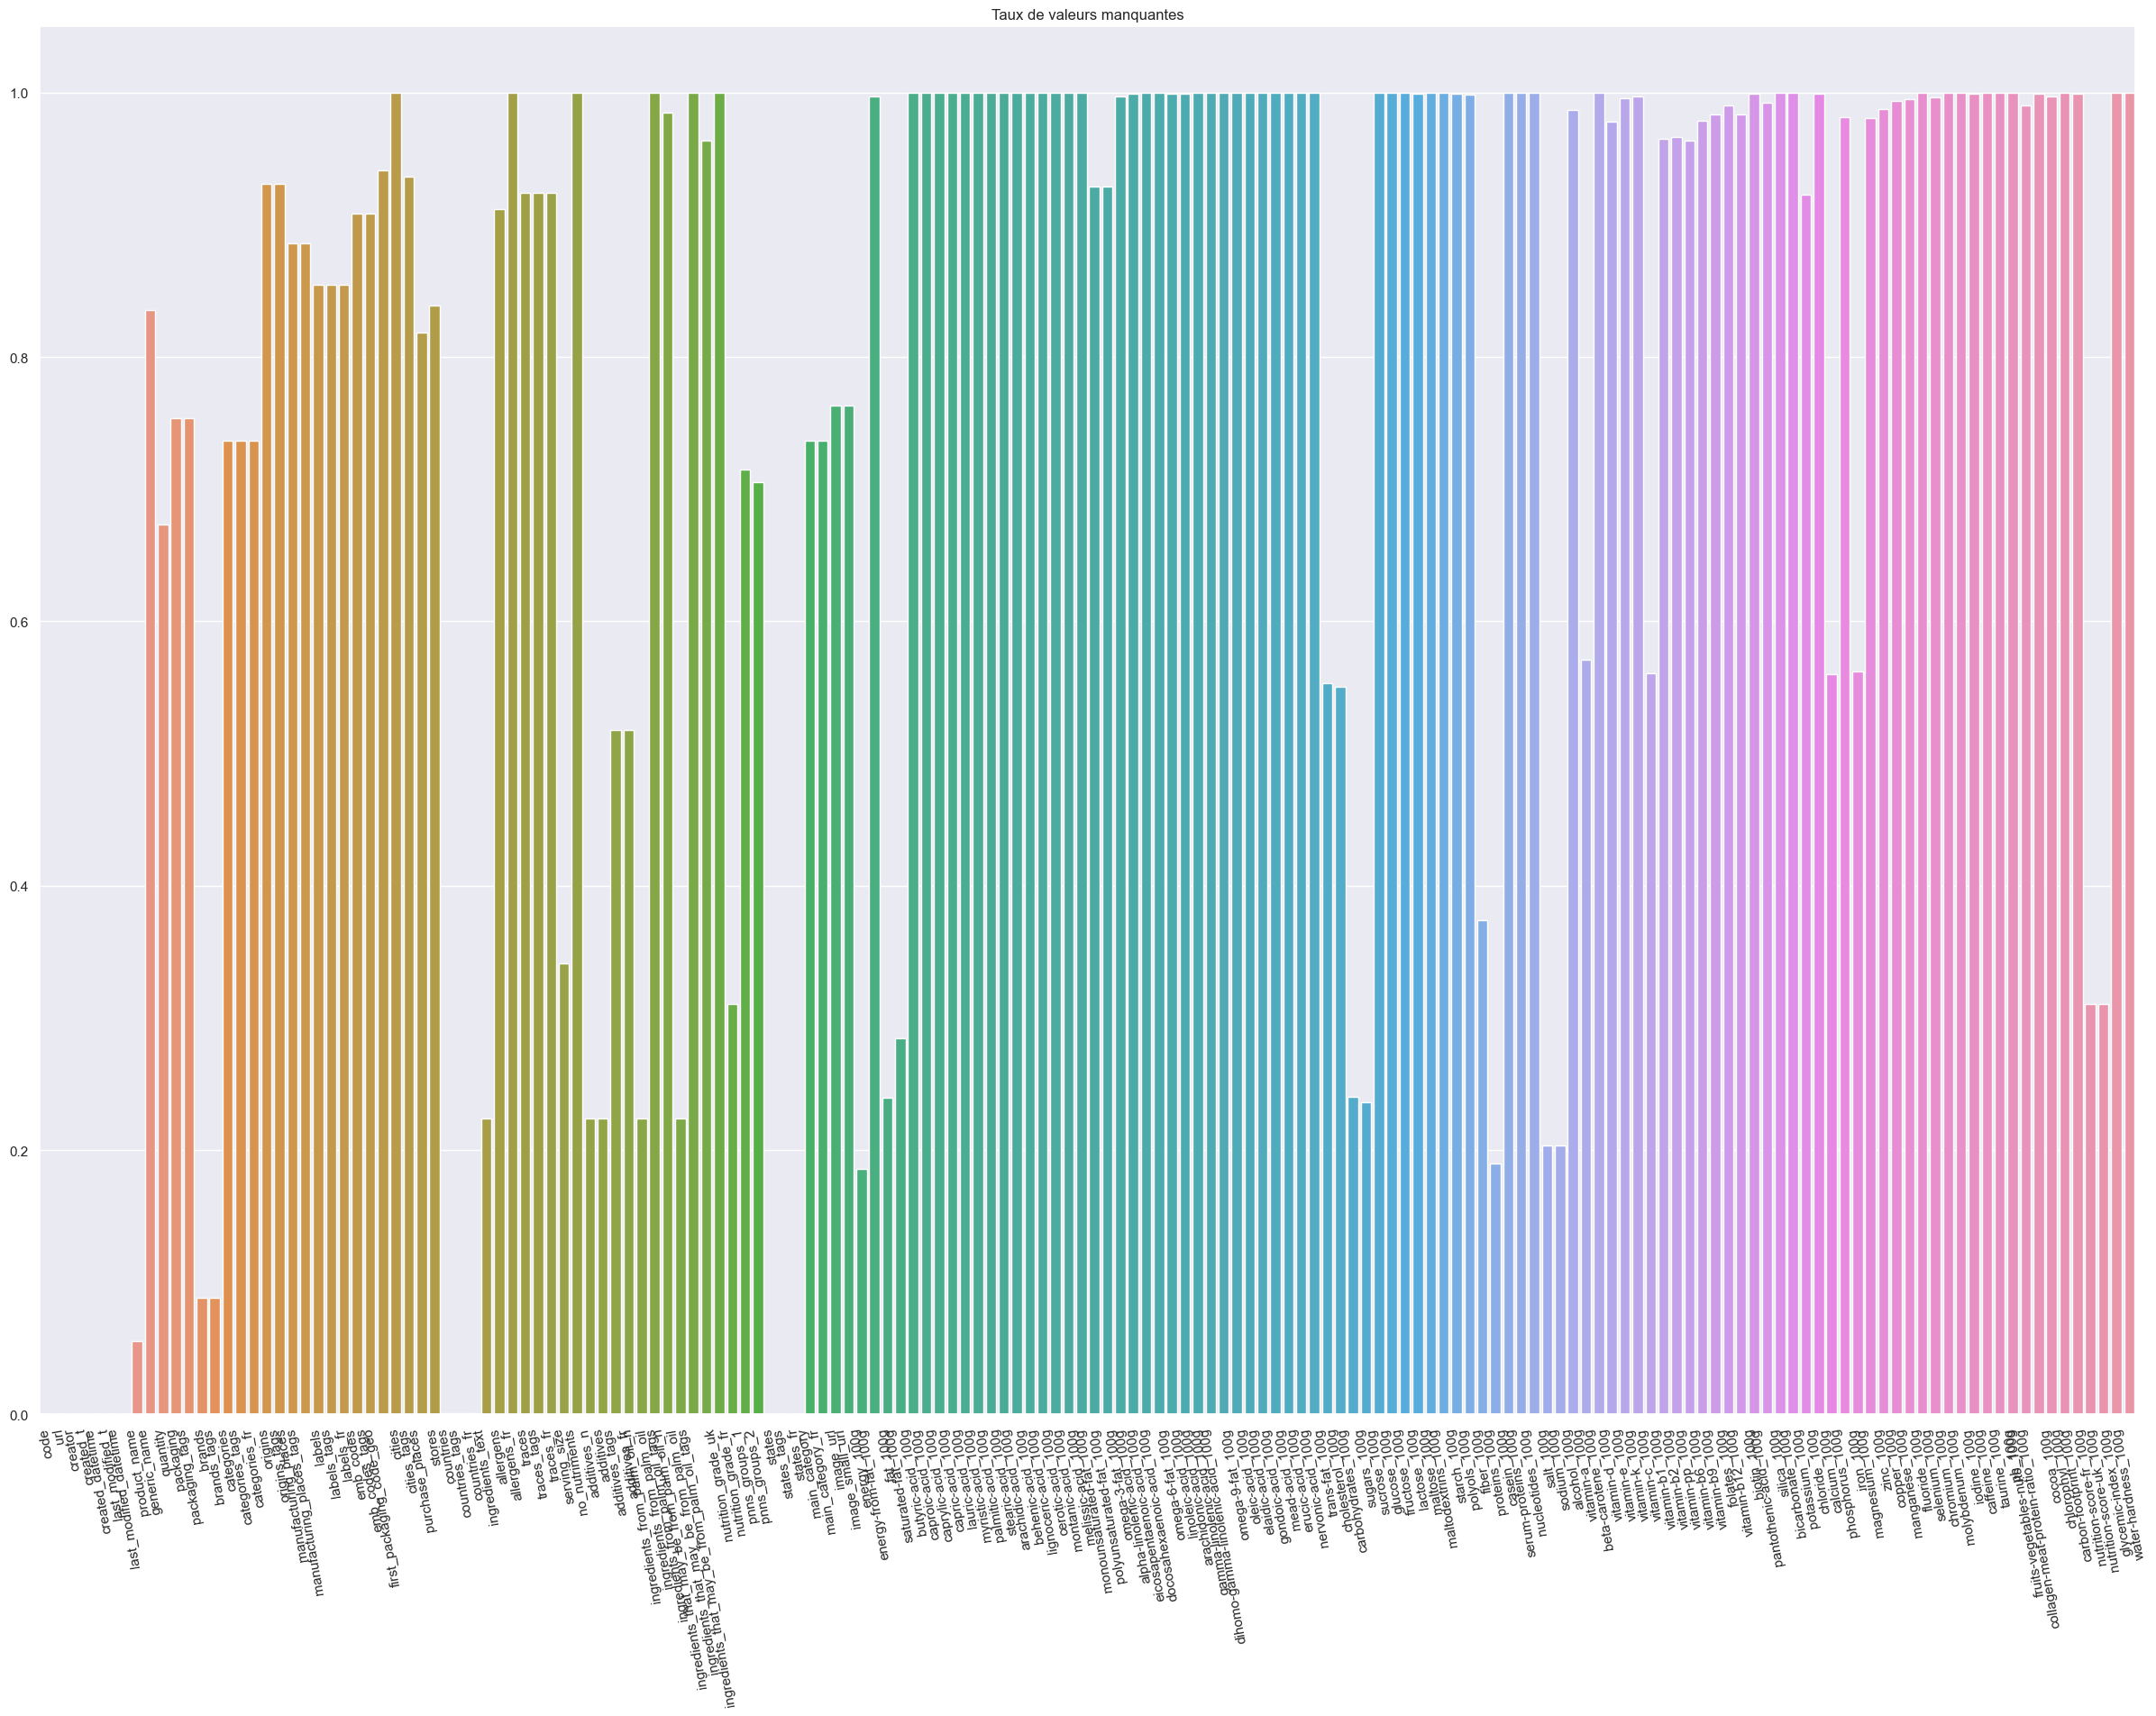

In [15]:
barplotsNAN( data3 )

In [16]:
# ici je procéde au seuil qui me permettra de pouvoir séléctionner les colonnes adéquats 
ratioNANs = ratio_NAN(data3)
selection_cols = [x for x in ratioNANs.columns if ratioNANs.loc[0, x]<0.6]
selection_cols

['code',
 'url',
 'creator',
 'created_t',
 'created_datetime',
 'last_modified_t',
 'last_modified_datetime',
 'product_name',
 'brands',
 'brands_tags',
 'countries',
 'countries_tags',
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_tags',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'states',
 'states_tags',
 'states_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g',
 'nutrition-score-uk_100g']

In [17]:
cols_utile= data3[['created_datetime',
 'last_modified_datetime',
 'product_name', 
 'countries_fr',
 'ingredients_text',
 'serving_size',
 'additives_n',
 'additives',
 'additives_fr',
 'ingredients_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'nutrition_grade_fr',
 'states_fr',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g',
 'nutrition-score-fr_100g']]

cols_utile.head(1)

,created_datetime,last_modified_datetime,product_name,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z,Farine de blé noir,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
cols_utile.shape

(320772, 29)

In [19]:
cols_utile.describe()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
count,248939.0,248939.0,248939.0,261113.0,243891.0,229554.0,143298.0,144090.0,243588.0,244971.0,200886.0,259922.0,255510.0,255463.0,137554.0,140867.0,141050.0,140462.0,221210.0
mean,1.9,0.0,0.1,1141.9,12.7,5.1,0.1,0.0,32.1,16.0,2.9,7.1,2.0,0.8,0.0,0.0,0.1,0.0,9.2
std,2.5,0.1,0.3,6447.2,17.6,8.0,1.5,0.4,29.7,22.3,12.9,8.4,128.3,50.5,0.1,2.2,3.3,0.2,9.1
min,0.0,0.0,0.0,0.0,0.0,0.0,-3.6,0.0,0.0,-17.9,-6.7,-800.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-15.0
25%,0.0,0.0,0.0,377.0,0.0,0.0,0.0,0.0,6.0,1.3,0.0,0.7,0.1,0.0,0.0,0.0,0.0,0.0,1.0
50%,1.0,0.0,0.0,1100.0,5.0,1.8,0.0,0.0,20.6,5.7,1.5,4.8,0.6,0.2,0.0,0.0,0.0,0.0,10.0
75%,3.0,0.0,0.0,1674.0,20.0,7.1,0.0,0.0,58.3,24.0,3.6,10.0,1.4,0.5,0.0,0.0,0.1,0.0,16.0
max,31.0,2.0,6.0,3251373.0,714.3,550.0,369.0,95.2,2916.7,3520.0,5380.0,430.0,64312.8,25320.0,26.7,717.0,694.7,50.0,40.0


In [20]:
cols_utile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 29 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   created_datetime                         320763 non-null  object 
 1   last_modified_datetime                   320772 non-null  object 
 2   product_name                             303010 non-null  object 
 3   countries_fr                             320492 non-null  object 
 4   ingredients_text                         248962 non-null  object 
 5   serving_size                             211331 non-null  object 
 6   additives_n                              248939 non-null  float64
 7   additives                                248905 non-null  object 
 8   additives_fr                             154680 non-null  object 
 9   ingredients_from_palm_oil_n              248939 non-null  float64
 10  ingredients_that_may_be_from_pal

In [21]:
cols_object = cols_utile.select_dtypes(include = ['object']).columns
cols_object

Index(['created_datetime', 'last_modified_datetime', 'product_name',
       'countries_fr', 'ingredients_text', 'serving_size', 'additives',
       'additives_fr', 'nutrition_grade_fr', 'states_fr'],
      dtype='object')

In [22]:
cols_float= cols_utile.select_dtypes(include = ['float']).columns
cols_float

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [23]:
cols_datetime = cols_utile[["created_datetime","last_modified_datetime"]]
cols_datetime

,created_datetime,last_modified_datetime
0,2016-09-17T09:17:46Z,2016-09-17T09:18:13Z
1,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
2,2017-03-09T14:32:37Z,2017-03-09T14:32:37Z
3,2017-03-09T10:35:31Z,2017-03-09T10:35:31Z
4,2017-03-09T10:34:13Z,2017-03-09T10:34:13Z
...,...,...
320767,2017-03-27T16:14:59Z,2017-04-03T18:34:58Z
320768,2017-03-09T11:31:16Z,2017-04-03T18:34:59Z
320769,2015-01-24T11:36:17Z,2017-04-03T18:34:59Z
320770,2017-04-16T10:54:49Z,2017-04-16T10:54:49Z


In [24]:
cols_datetime.isnull().sum()

created_datetime          9
last_modified_datetime    0
dtype: int64

In [25]:
cols_datetime['created_datetime'] = pd.to_datetime(arg=cols_datetime['created_datetime'], errors='coerce')
cols_datetime
cols_datetime['last_modified_datetime'] = pd.to_datetime(arg=cols_datetime['last_modified_datetime'], errors='coerce' )
cols_datetime

/var/folders/jx/cxdyp9956m9_6lhgbtf345c40000gn/T/ipykernel_736/3583004025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cols_datetime['created_datetime'] = pd.to_datetime(arg=cols_datetime['created_datetime'], errors='coerce')
/var/folders/jx/cxdyp9956m9_6lhgbtf345c40000gn/T/ipykernel_736/3583004025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cols_datetime['last_modified_datetime'] = pd.to_datetime(arg=cols_datetime['last_modified_datetime'], errors='coerce' )


,created_datetime,last_modified_datetime
0,2016-09-17 09:17:46+00:00,2016-09-17 09:18:13+00:00
1,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00
2,2017-03-09 14:32:37+00:00,2017-03-09 14:32:37+00:00
3,2017-03-09 10:35:31+00:00,2017-03-09 10:35:31+00:00
4,2017-03-09 10:34:13+00:00,2017-03-09 10:34:13+00:00
...,...,...
320767,2017-03-27 16:14:59+00:00,2017-04-03 18:34:58+00:00
320768,2017-03-09 11:31:16+00:00,2017-04-03 18:34:59+00:00
320769,2015-01-24 11:36:17+00:00,2017-04-03 18:34:59+00:00
320770,2017-04-16 10:54:49+00:00,2017-04-16 10:54:49+00:00


In [26]:
cols_datetime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   created_datetime        320748 non-null  datetime64[ns, UTC]
 1   last_modified_datetime  320749 non-null  datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 4.9 MB


In [27]:
# les ancienne types de date ont été supprimée
cols_reogarniser = cols_utile.drop(columns = ['created_datetime', 'last_modified_datetime'], axis = 1)
cols_reogarniser.head()

,product_name,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,Farine de blé noir,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar ] [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar ] [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar ] [ or-palm-oil-sugar -> en:or-palm-oil-sugar ] [ palm-oil-sugar -> en:palm-oil-sugar ] [ oil-sugar -> en:oil-sugar ] [ sugar -> en:sugar ] [ natural-banana-flavor -> en:natural-banana-flavor ] [ banana-flavor -> en:banana-flavor ] [ flavor -> en:flavor ],NaN,0.0,0.0,d,"A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques à compléter,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer",2243.0,28.6,28.6,0.0,0.0,64.3,14.3,3.6,3.6,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2,Peanuts,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar -> en:sugar ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ tapioca-starch -> en:tapioca-starch ] [ starch -> en:starch ] [ salt -> en:salt ] [ leavening -> en:leavening ] [ ammonium-bicarbonate -> en:ammonium-bicarbonate ] [ bicarbonate -> en:bicarbonate ] [ baking-soda -> en:baking-soda ] [ soda -> en:soda ] [ soy-sauce -> en:soy-sauce ] [ sauce -> en:sauce ] [ water -> en:water ] [ soybeans -> en:soybeans ] [ wheat -> en:wheat ] [ salt -> en:salt ] [ potato-starch -> en:potato-starch ] [ starch -> en:starch ],NaN,0.0,0.0,b,"A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer",1941.0,17.9,0.0,0.0,0.0,60.7,17.9,7.1,17.9,0.6,0.2,0.0,0.0,0.1,0.0,0.0
3,Organic Salted Nut Mix,États-Unis,"Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ] [ hazelnuts -> en:hazelnuts ] [ organic-cashews -> en:organic-cashews ] [ cashews -> en:cashews ] [ organic-walnuts-almonds -> en:organic-walnuts-almonds ] [ walnuts-almonds -> en:walnuts-almonds ] [ almonds -> en:almonds ] [ organic-sunflower-oil -> en:organic-sunflower-oil ] [ sunflower-oil -> en:sunflower-oil ] [ oil -> en:oil ] [ sea-salt -> en:sea-salt ] [ salt -> en:salt ],NaN,0.0,0.0,d,"A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envo

In [28]:
# nouveau dataframe avec les types de dates réajustée en Datetime
# cols_reogarniser = pd.concat([cols_reogarniser,cols_datetime], axis=1)

In [29]:
cols_reogarniser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 27 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   product_name                             303010 non-null  object 
 1   countries_fr                             320492 non-null  object 
 2   ingredients_text                         248962 non-null  object 
 3   serving_size                             211331 non-null  object 
 4   additives_n                              248939 non-null  float64
 5   additives                                248905 non-null  object 
 6   additives_fr                             154680 non-null  object 
 7   ingredients_from_palm_oil_n              248939 non-null  float64
 8   ingredients_that_may_be_from_palm_oil_n  248939 non-null  float64
 9   nutrition_grade_fr                       221210 non-null  object 
 10  states_fr                       

In [30]:
num100_columns = cols_reogarniser.select_dtypes(include = ["float"]).columns
num100_columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [31]:
columns_100g = num100_columns[(num100_columns.str.contains("_100g"))]
columns_100g

Index(['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g'],
      dtype='object')

In [32]:
columns_100g_energy = num100_columns[(num100_columns.str.contains("energy_100g"))]
columns_100g_energy 

Index(['energy_100g'], dtype='object')

In [33]:
# je fais un nouveau dataframe sans les colonne des ingrédients de 100g pour pouvoir réajustées les valeurs.

df_without_100g = cols_reogarniser.drop(columns = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g','nutrition-score-fr_100g'], axis = 1 )

df_without_100g.head()

,product_name,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states_fr
0,Farine de blé noir,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées"
1,Banana Chips Sweetened (Whole),États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar ] [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar ] [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar ] [ or-palm-oil-sugar -> en:or-palm-oil-sugar ] [ palm-oil-sugar -> en:palm-oil-sugar ] [ oil-sugar -> en:oil-sugar ] [ sugar -> en:sugar ] [ natural-banana-flavor -> en:natural-banana-flavor ] [ banana-flavor -> en:banana-flavor ] [ flavor -> en:flavor ],NaN,0.0,0.0,d,"A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques à compléter,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer"
2,Peanuts,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar -> en:sugar ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ tapioca-starch -> en:tapioca-starch ] [ starch -> en:starch ] [ salt -> en:salt ] [ leavening -> en:leavening ] [ ammonium-bicarbonate -> en:ammonium-bicarbonate ] [ bicarbonate -> en:bicarbonate ] [ baking-soda -> en:baking-soda ] [ soda -> en:soda ] [ soy-sauce -> en:soy-sauce ] [ sauce -> en:sauce ] [ water -> en:water ] [ soybeans -> en:soybeans ] [ wheat -> en:wheat ] [ salt -> en:salt ] [ potato-starch -> en:potato-starch ] [ starch -> en:starch ],NaN,0.0,0.0,b,"A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer"
3,Organic Salted Nut Mix,États-Unis,"Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ] [ hazelnuts -> en:hazelnuts ] [ organic-cashews -> en:organic-cashews ] [ cashews -> en:cashews ] [ organic-walnuts-almonds -> en:organic-walnuts-almonds ] [ walnuts-almonds -> en:walnuts-almonds ] [ almonds -> en:almonds ] [ organic-sunflower-oil -> en:organic-sunflower-oil ] [ sunflower-oil -> en:sunflower-oil ] [ oil -> en:oil ] [ sea-salt -> en:sea-salt ] [ salt -> en:salt ],NaN,0.0,0.0,d,"A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer"
4,Organic Polenta,États-Unis,Organic polenta,35 g (0.25 cup),0.0,[ organic-polenta -> en:organic-polenta ] [ polenta -> en:polenta ],NaN,0.0,0.0,NaN,"A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à 

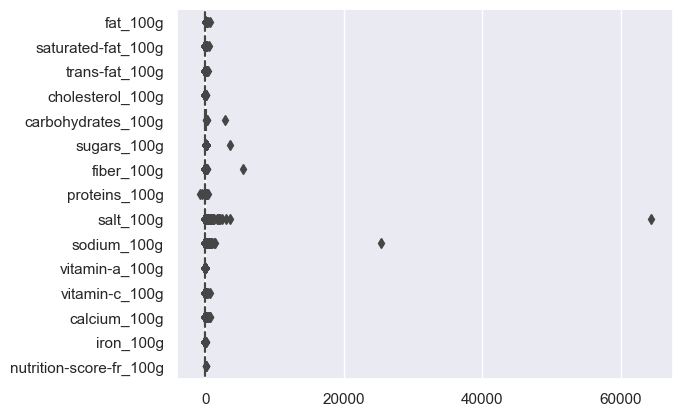

<Figure size 1000x900 with 0 Axes>

In [34]:
# je fais un boxplot (diagramme en boîte) pour voir les valeurs numérique. Sauf pour "energy_100g" que je fais seule
sns.boxplot(data= cols_reogarniser[columns_100g].drop(columns= ["energy_100g"], axis=1, inplace=False),  orient= "h")
plt.figure(figsize = (10, 9))
sns.set(font_scale=1.5)

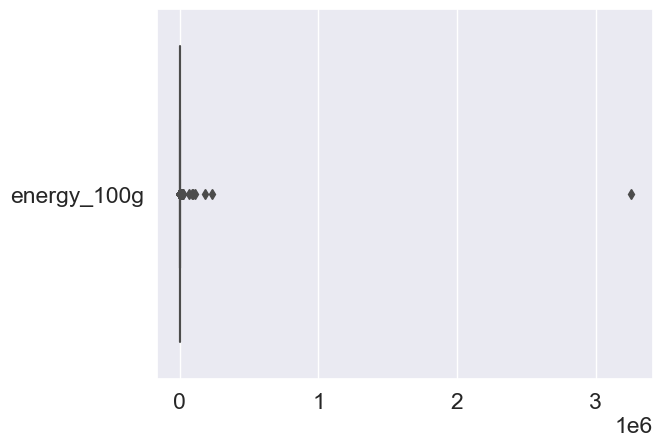

<Figure size 1000x900 with 0 Axes>

In [35]:
# ici je fais le diagrame en boite de "energy_100g" pour ne pas à avoir un tres grand écart car les valeur ne sont pas pareil, ici c'est en kilojoules soit des données de 1e6 (1000000)
sns.boxplot(data= cols_reogarniser[columns_100g_energy], orient= "h")
plt.figure(figsize = (10, 9))
sns.set(font_scale=1.5)

In [36]:
# ici je prepare un dataframe sans "energy_100g" car on en a pas besoins pour l'instant
colomns100g= cols_reogarniser[['fat_100g', 'saturated-fat_100g', 'trans-fat_100g',
       'cholesterol_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'vitamin-a_100g',
       'vitamin-c_100g', 'calcium_100g', 'iron_100g',
       'nutrition-score-fr_100g']]
colomns100g

,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.6,28.6,0.0,0.0,64.3,14.3,3.6,3.6,0.0,0.0,0.0,0.0,0.0,0.0,14.0
2,17.9,0.0,0.0,0.0,60.7,17.9,7.1,17.9,0.6,0.2,0.0,0.0,0.1,0.0,0.0
3,57.1,5.4,NaN,NaN,17.9,3.6,7.1,17.9,1.2,0.5,NaN,NaN,0.1,0.0,12.0
4,1.4,NaN,NaN,NaN,77.1,NaN,5.7,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
columns_100g = pd.DataFrame(data=np.where((colomns100g <= 0) | (colomns100g >= 100), np.NaN, colomns100g), columns=colomns100g.columns)
columns_100g 

,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,28.6,28.6,NaN,0.0,64.3,14.3,3.6,3.6,NaN,NaN,NaN,0.0,NaN,0.0,14.0
2,17.9,NaN,NaN,NaN,60.7,17.9,7.1,17.9,0.6,0.2,NaN,NaN,0.1,0.0,NaN
3,57.1,5.4,NaN,NaN,17.9,3.6,7.1,17.9,1.2,0.5,NaN,NaN,0.1,0.0,12.0
4,1.4,NaN,NaN,NaN,77.1,NaN,5.7,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
columns_energy_100g = cols_reogarniser[["energy_100g"]]
columns_energy_100g

,energy_100g
0,NaN
1,2243.0
2,1941.0
3,2540.0
4,1552.0
...,...
320767,NaN
320768,0.0
320769,NaN
320770,NaN


In [39]:
# Le but est de trier la colonne "energy_100g", etant donnée que c'est en Kilojoule elle ne peux pas dépasser
# la valeur maximale de 3765.6 kilojoule sois 900 Kcal, et ne peux être inferieure à 0 kilojoules.

new_columns_energy = pd.DataFrame(data= np.where((columns_energy_100g <= 0.0) | (columns_energy_100g>= 3765.6), np.NaN, columns_energy_100g), columns = columns_energy_100g.columns)
new_columns_energy

,energy_100g
0,NaN
1,2243.0
2,1941.0
3,2540.0
4,1552.0
...,...
320767,NaN
320768,NaN
320769,NaN
320770,NaN


In [40]:
# j'affiche la valeur maximale pour "energy_100g", elle ne dois pas dépasser 3765.60 kilojoule sois 900 Kcal
new_columns_energy["energy_100g"].max()

3764.0

In [41]:
# j'additionne chaques lignes de produit des ingredient de 100g
columns_100g.sum(axis=1) 

0          0.0
1        156.9
2        122.3
3        122.7
4         92.8
          ... 
320767     0.0
320768     0.0
320769     0.0
320770     0.0
320771     0.0
Length: 320772, dtype: float64

In [42]:
columns_mask = pd.concat([new_columns_energy,columns_100g], axis=1)
columns_mask 

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2243.0,28.6,28.6,NaN,0.0,64.3,14.3,3.6,3.6,NaN,NaN,NaN,0.0,NaN,0.0,14.0
2,1941.0,17.9,NaN,NaN,NaN,60.7,17.9,7.1,17.9,0.6,0.2,NaN,NaN,0.1,0.0,NaN
3,2540.0,57.1,5.4,NaN,NaN,17.9,3.6,7.1,17.9,1.2,0.5,NaN,NaN,0.1,0.0,12.0
4,1552.0,1.4,NaN,NaN,NaN,77.1,NaN,5.7,8.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# je crée un nouveau Dataframe avec les valeurs ajustées des ingrédients de 100G

df_sum = pd.concat([df_without_100g, columns_mask], axis=1)
df_sum.head()

,product_name,countries_fr,ingredients_text,serving_size,additives_n,additives,additives_fr,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutrition_grade_fr,states_fr,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,Farine de blé noir,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"A compléter,Informations nutritionnelles à compléter,Ingrédients à compléter,Date limite à compléter,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité complétée,Nom du produit complete,Photos à valider,Photos envoyées",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Banana Chips Sweetened (Whole),États-Unis,"Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.",28 g (1 ONZ),0.0,[ bananas -> en:bananas ] [ vegetable-oil -> en:vegetable-oil ] [ oil -> en:oil ] [ coconut-oil -> en:coconut-oil ] [ oil -> en:oil ] [ corn-oil-and-or-palm-oil-sugar -> en:corn-oil-and-or-palm-oil-sugar ] [ oil-and-or-palm-oil-sugar -> en:oil-and-or-palm-oil-sugar ] [ and-or-palm-oil-sugar -> en:and-or-palm-oil-sugar ] [ or-palm-oil-sugar -> en:or-palm-oil-sugar ] [ palm-oil-sugar -> en:palm-oil-sugar ] [ oil-sugar -> en:oil-sugar ] [ sugar -> en:sugar ] [ natural-banana-flavor -> en:natural-banana-flavor ] [ banana-flavor -> en:banana-flavor ] [ flavor -> en:flavor ],NaN,0.0,0.0,d,"A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques à compléter,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer",2243.0,28.6,28.6,NaN,0.0,64.3,14.3,3.6,3.6,NaN,NaN,NaN,0.0,NaN,0.0,14.0
2,Peanuts,États-Unis,"Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.",28 g (0.25 cup),0.0,[ peanuts -> en:peanuts ] [ wheat-flour -> en:wheat-flour ] [ flour -> en:flour ] [ sugar -> en:sugar ] [ rice-flour -> en:rice-flour ] [ flour -> en:flour ] [ tapioca-starch -> en:tapioca-starch ] [ starch -> en:starch ] [ salt -> en:salt ] [ leavening -> en:leavening ] [ ammonium-bicarbonate -> en:ammonium-bicarbonate ] [ bicarbonate -> en:bicarbonate ] [ baking-soda -> en:baking-soda ] [ soda -> en:soda ] [ soy-sauce -> en:soy-sauce ] [ sauce -> en:sauce ] [ water -> en:water ] [ soybeans -> en:soybeans ] [ wheat -> en:wheat ] [ salt -> en:salt ] [ potato-starch -> en:potato-starch ] [ starch -> en:starch ],NaN,0.0,0.0,b,"A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envoyer",1941.0,17.9,NaN,NaN,NaN,60.7,17.9,7.1,17.9,0.6,0.2,NaN,NaN,0.1,0.0,NaN
3,Organic Salted Nut Mix,États-Unis,"Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.",28 g (0.25 cup),0.0,[ organic-hazelnuts -> en:organic-hazelnuts ] [ hazelnuts -> en:hazelnuts ] [ organic-cashews -> en:organic-cashews ] [ cashews -> en:cashews ] [ organic-walnuts-almonds -> en:organic-walnuts-almonds ] [ walnuts-almonds -> en:walnuts-almonds ] [ almonds -> en:almonds ] [ organic-sunflower-oil -> en:organic-sunflower-oil ] [ sunflower-oil -> en:sunflower-oil ] [ oil -> en:oil ] [ sea-salt -> en:sea-salt ] [ salt -> en:salt ],NaN,0.0,0.0,d,"A compléter,Informations nutritionnelles complétées,Ingrédients complétés,Date limite à compléter,en:Packaging-code-to-be-completed,Caractéristiques à compléter,Catégories à compléter,Marques complétées,Emballage à compléter,Quantité à compléter,Nom du produit complete,Photos à envo

In [44]:
# exemple pour voir quel produit on obtient quand on séléctionne un nombre de kilojoules 
df_sum[df_sum['energy_100g'].isin([2243])]

product_name  \
1                                      Banana Chips Sweetened (Whole)   
148                                            Banana Chips Sweetened   
306                                             Sea Salt Potato Chips   
417                                      Blueberry Pomegranate Crunch   
866     Long Grove Confectionery Co., Graham Crackers, Milk Chocolate   
...                                                               ...   
298945                                                  Milka Caramel   
298954                           Milka Caramelo / Caramello / Karamel   
300380                                                        Bar Mix   
300746                                         Granola, Pumpkin Spice   
312349                                            Premium Puffed Corn   

                            countries_fr  \
1                             États-Unis   
148                           États-Unis   
306                           États-Unis   
417                           États-Unis   
866                           États-Unis   
...                                  ...   
298945                            France   
298954  Italie,Pays-Bas,Portugal,Espagne   
300380                        États-Unis   
300746                        États-Unis   
312349                        États-Unis   

                                                                                                                                                                                                                                                                                                                                                                                                     ingredients_text  \
1                                                                                                                                                                                                                                                                                                                        Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.   
148                                                                                                                                                                                                                                                                                                                        Bananas, vegetable oil(coconut oil, corn oil, and/or palm oil)sugar, natural banana flavor   
306                                                                                                                                                                                                                                                                                                                                                                       Unpeeled potatoes, sunflower oil, sea salt.   
417                                                                                                                                                                                                                                                          Ingredients: dry roasted almonds, cashews, pistachios, pure cane sugar, rice syrup, dried blueberries, pomegranate powder, sea salt and natural flavors.   
866                                                                                                                                                    Milk chocolate (sugar, whole milk, cocoa butter, chocolate liquor, soy lecithin [emulsifier], vanilla), graham cracker (whole wheat flour, enriched flour [wheat flour, niacin, reduced iron, thiamin mononitrate [vitamin b1], riboflavin [vitamin b2], folic   
...                                                                                                                                                                                                  

In [45]:
#j'écarte les produits qui contiennent plus que 60% de NaN parmi ces features numériques.
df_sum_reajuste = df_sum.dropna(how='any',thresh=df_sum.shape[1]*0.60, axis=0, inplace= False)
df_sum_reajuste.head()

product_name countries_fr  \
1     Banana Chips Sweetened (Whole)   États-Unis   
2                            Peanuts   États-Unis   
3             Organic Salted Nut Mix   États-Unis   
5  Breadshop Honey Gone Nuts Granola   États-Unis   
7                     Organic Muesli   États-Unis   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ingredients_text  \
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.   
5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Rolled oats, grape concentrate, expeller pressed canola oil, sunflower seeds, almonds, walnuts oat bran, sesame seeds, cashews, natural vitamin e.   
7  Org oats, org hemp granola (org oats, evaporated cane juice, org expeller-pressed canola oil, crispy rice [org brown rice flour, org evaporated cane juice, org molasses, sea salt], org flax seeds, org oat solids, hemp seeds), org raisins, org dates, org almonds, org hazelnuts, org coconut, org sunflower seeds, org pumpkin seeds, org flax seeds, org corn flakes (org corn meal, org grape and/or pear juice concentrate, sea salt), org quinoa amaranth flakes (org corn meal, org yellow corn flour, org evaporated cane juice, org flax, org buckwheat

In [46]:
df_sum_reajuste.shape

(188258, 27)

In [47]:
df_sum_reajuste = df_sum_reajuste.reset_index(drop=True)

# Simple Imputer

In [48]:
column_fiber = df_sum_reajuste[["fiber_100g"]]
column_fiber

,fiber_100g
0,3.6
1,7.1
2,7.1
3,7.7
4,9.4
...,...
188253,0.6
188254,1.5
188255,8.3
188256,4.7


In [49]:
# ici je fais un simple imputer pour la colonne Fibre, 
# Imputer univarié pour compléter les valeurs manquantes le long de la colonne, à l'aide d'une valeur constante.
# ici c'est zéro la valeur constante
imputer_fibre = SimpleImputer(missing_values= np.nan, strategy="constant", fill_value=0)

imputer_fibre.fit_transform(column_fiber)

array([[3.6],
       [7.1],
       [7.1],
       ...,
       [8.3],
       [4.7],
       [0.2]])

In [50]:
df_sum_reajuste.isnull().sum(axis = 0)

product_name                                 1179
countries_fr                                   42
ingredients_text                              189
serving_size                                22790
additives_n                                   189
additives                                     208
additives_fr                                64432
ingredients_from_palm_oil_n                   189
ingredients_that_may_be_from_palm_oil_n       189
nutrition_grade_fr                           6153
states_fr                                       0
energy_100g                                   275
fat_100g                                    30340
saturated-fat_100g                          55738
trans-fat_100g                             185352
cholesterol_100g                           134522
carbohydrates_100g                           8349
sugars_100g                                 26989
fiber_100g                                  73447
proteins_100g                               17935


In [51]:
# j’ai récupérer toutes les colonnes de 100g pour faire le KNN 

KNN_prepa = df_sum_reajuste[["energy_100g","fat_100g","saturated-fat_100g", "trans-fat_100g","cholesterol_100g", 
                 "carbohydrates_100g", "sugars_100g","fiber_100g","proteins_100g","salt_100g","sodium_100g",
                "vitamin-a_100g","vitamin-c_100g", "calcium_100g", "iron_100g", "nutrition-score-fr_100g"]]
KNN_prepa

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,2243.0,28.6,28.6,NaN,0.0,64.3,14.3,3.6,3.6,NaN,NaN,NaN,0.0,NaN,0.0,14.0
1,1941.0,17.9,NaN,NaN,NaN,60.7,17.9,7.1,17.9,0.6,0.2,NaN,NaN,0.1,0.0,NaN
2,2540.0,57.1,5.4,NaN,NaN,17.9,3.6,7.1,17.9,1.2,0.5,NaN,NaN,0.1,0.0,12.0
3,1933.0,18.3,1.9,NaN,NaN,63.5,11.5,7.7,13.5,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,1833.0,18.8,4.7,NaN,NaN,57.8,15.6,9.4,14.1,0.1,0.1,NaN,NaN,0.1,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188253,660.0,6.9,0.5,NaN,NaN,23.1,16.7,0.6,0.3,0.5,0.2,NaN,NaN,NaN,NaN,6.0
188254,1031.0,1.3,1.3,NaN,NaN,95.3,0.1,1.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2.0
188255,1393.0,9.7,2.8,NaN,NaN,61.1,30.6,8.3,5.6,1.0,0.4,0.0,0.1,0.6,0.0,11.0
188256,1477.0,NaN,NaN,NaN,NaN,87.1,2.4,4.7,1.2,0.0,0.0,NaN,NaN,NaN,0.0,NaN


In [52]:
df_new_reajuste = df_sum_reajuste.drop(["energy_100g","fat_100g","saturated-fat_100g", "trans-fat_100g","cholesterol_100g", 
                 "carbohydrates_100g", "sugars_100g","fiber_100g","proteins_100g","salt_100g","sodium_100g",
                "vitamin-a_100g","vitamin-c_100g", "calcium_100g", "iron_100g", "nutrition-score-fr_100g"], axis=1)

df_new_reajuste

product_name countries_fr  \
0          Banana Chips Sweetened (Whole)   États-Unis   
1                                 Peanuts   États-Unis   
2                  Organic Salted Nut Mix   États-Unis   
3       Breadshop Honey Gone Nuts Granola   États-Unis   
4                          Organic Muesli   États-Unis   
...                                   ...          ...   
188253  Santa Cruz Chilli & Lime Dressing  Royaume-Uni   
188254     Fisherman's Friend Miel-Citron       France   
188255                      Organic Z Bar   États-Unis   
188256                    Natural Cassava   États-Unis   
188257                 Thé vert Earl grey       France   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        ingredients_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Rolled oats, grape concentrate, expeller pressed canola oil, sunflower seeds, almonds, walnuts oat bran, sesame seeds, cashews, natural vitamin e.   
4       Org oats, org hemp granola (org oats, evaporated cane juice, org expeller-pressed canola oil, crispy rice [org brown rice flour, org evaporated 

# KNN

In [53]:
# L'algorithme des k plus proches voisins, 
# KNN utilise la proximité pour effectuer des classifications ou des prédictions sur le regroupement d'un point de données individuel.
# ici je combles les valeurs nulls avec KNNImputer (avec 3 voisin par example)
imputer = KNNImputer(n_neighbors=3) 
KNN_df_100g = pd.DataFrame(imputer.fit_transform(KNN_prepa),columns = KNN_prepa.columns)
KNN_df_100g

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,2243.0,28.6,28.6,2.0,0.0,64.3,14.3,3.6,3.6,20.1,7.9,0.0,0.0,0.3,0.0,14.0
1,1941.0,17.9,5.3,5.4,0.1,60.7,17.9,7.1,17.9,0.6,0.2,0.0,0.0,0.1,0.0,10.0
2,2540.0,57.1,5.4,16.8,0.0,17.9,3.6,7.1,17.9,1.2,0.5,0.0,0.0,0.1,0.0,12.0
3,1933.0,18.3,1.9,3.6,0.2,63.5,11.5,7.7,13.5,20.8,8.2,0.0,0.0,0.0,0.0,10.7
4,1833.0,18.8,4.7,4.9,0.1,57.8,15.6,9.4,14.1,0.1,0.1,0.0,0.0,0.1,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188253,660.0,6.9,0.5,5.8,0.0,23.1,16.7,0.6,0.3,0.5,0.2,0.0,0.0,0.1,0.0,6.0
188254,1031.0,1.3,1.3,1.0,0.1,95.3,0.1,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
188255,1393.0,9.7,2.8,7.0,0.2,61.1,30.6,8.3,5.6,1.0,0.4,0.0,0.1,0.6,0.0,11.0
188256,1477.0,7.0,2.3,0.9,0.1,87.1,2.4,4.7,1.2,0.0,0.0,0.0,0.0,0.0,0.0,9.7


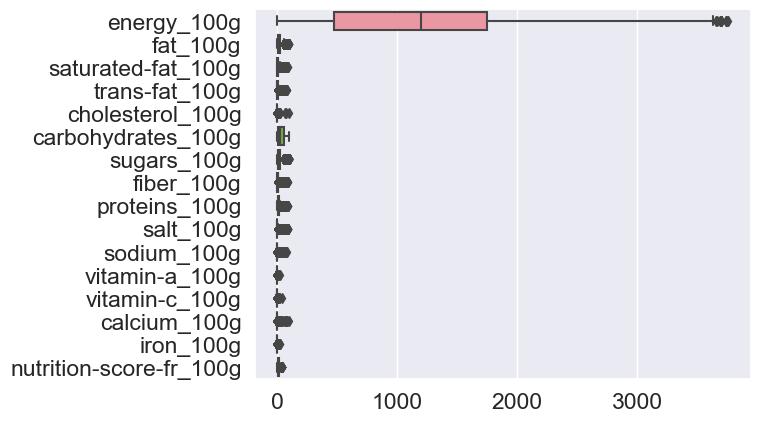

<Figure size 1000x900 with 0 Axes>

In [54]:
sns.boxplot(data= KNN_df_100g, orient="h")
plt.figure(figsize = (10, 9))
sns.set(font_scale=1.5)

Les côtés gauche et droit de la boîte sont les quartiles inférieur et supérieur. La boîte couvre donc l'intervalle interquartile, là où se situent 50 % des données. La ligne verticale qui sépare la boîte en deux représente la médiane.

On peux voir que pour energy la mediane ce situe bien entre 1000 et 2000 kilojoules et que le maximum est bien compris vers 3000 kilojoules et le minimum est bien égale à 0.

Q1 est compris vers 800 et Q3 est compris vers 1900.

# KNeighbourClassifier 

In [55]:
columns_grade = df_sum_reajuste[["nutrition_grade_fr"]]
columns_grade

,nutrition_grade_fr
0,d
1,b
2,d
3,NaN
4,c
...,...
188253,c
188254,b
188255,d
188256,a


In [56]:
 # pour toutes les lettres de "A à E", je remplace par les chiffres de (0 à 4) 

columns_grade["nutrition_grade_fr"].replace(["a","b","c","d","e"], [0, 1, 2, 3, 4], inplace= True)
columns_grade

/var/folders/jx/cxdyp9956m9_6lhgbtf345c40000gn/T/ipykernel_736/2138555206.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_grade["nutrition_grade_fr"].replace(["a","b","c","d","e"], [0, 1, 2, 3, 4], inplace= True)


,nutrition_grade_fr
0,3.0
1,1.0
2,3.0
3,NaN
4,2.0
...,...
188253,2.0
188254,1.0
188255,3.0
188256,0.0


In [57]:
# pour tous les NAN je remplace par par le chiffre 5
index = columns_grade['nutrition_grade_fr'].index[columns_grade['nutrition_grade_fr'].apply(np.isnan)]
columns_grade.iloc[index, :] = 5

/var/folders/jx/cxdyp9956m9_6lhgbtf345c40000gn/T/ipykernel_736/3943110912.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  columns_grade.iloc[index, :] = 5


In [58]:
columns_grade.iloc[index, :]

,nutrition_grade_fr
3,5.0
5,5.0
7,5.0
8,5.0
11,5.0
...,...
188204,5.0
188205,5.0
188206,5.0
188207,5.0


In [59]:
columns_grade = np.ravel(columns_grade)
columns_grade.shape

(188258,)

In [60]:
#columns_utiles = columns_utiles.reshape(-1,1)
#columns_utiles

print(columns_grade.shape)
print(KNN_df_100g.shape)

(188258,)
(188258, 16)


In [61]:
# ici je fais un KNeighbourClassifier pour nutrition_grades en faisant le learning curve 
# afin de trouver le bon nombre des voisins

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(KNN_df_100g, columns_grade,  train_size=0.3)

In [62]:
from sklearn import neighbors

In [63]:
model = neighbors.KNeighborsClassifier(n_neighbors=3)
model

KNeighborsClassifier(n_neighbors=3)

In [64]:
# Boucle for (nb_voisin) pour s’avoir quel voisin prendre entre 1 et 15

for nb_voisin in range(1, 15):
    model = neighbors.KNeighborsClassifier(n_neighbors=nb_voisin)
    model.fit(x_train, y_train)
    print(f"nombre de voisins: K= {nb_voisin} - pour une précision de : {round(model.score(x_test, y_test) * 100, 2)}%")

/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 1 - pour une précision de : 76.1%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 2 - pour une précision de : 73.42%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 3 - pour une précision de : 74.28%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 4 - pour une précision de : 73.58%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 5 - pour une précision de : 73.58%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 6 - pour une précision de : 72.97%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 7 - pour une précision de : 72.82%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 8 - pour une précision de : 72.46%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 9 - pour une précision de : 72.19%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 10 - pour une précision de : 71.67%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 11 - pour une précision de : 71.41%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 12 - pour une précision de : 71.12%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 13 - pour une précision de : 70.87%


/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


nombre de voisins: K= 14 - pour une précision de : 70.55%


Comme on peut le voir, le k-NN le plus performant est celui pour lequel k = 3, pour une précision de 74.28%. 
On connaît donc notre classifieur final optimal : 3-nn. Ce qui veut dire que c'est celui qui classifie le mieux les données. Donc en ayant fait le learning curve afin de trouver le bon nombre des voisins on obtient le meilleurs de nombre de voisin est de 3.

In [65]:
# récupérer colonnes pour prédire un score de grade
x_test

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
169337,247.0,0.3,0.1,0.3,0.0,12.4,10.8,1.8,0.6,0.0,0.0,0.0,0.0,0.0,0.0,6.7
49799,1326.0,8.0,2.2,1.0,0.2,83.3,51.7,6.2,12.8,0.4,0.2,0.0,0.0,0.1,0.0,14.0
54029,837.0,10.8,6.9,9.1,0.1,23.1,18.5,1.5,4.6,0.2,0.1,0.0,0.1,0.2,0.0,12.0
39465,1766.0,11.1,10.0,1.0,0.1,55.6,33.3,8.9,22.2,1.1,0.4,0.0,0.0,0.6,0.0,20.0
61931,418.0,0.9,0.6,5.2,0.0,20.0,17.1,1.5,4.1,0.1,0.1,0.0,0.0,0.1,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4635,908.0,8.7,5.1,0.6,0.0,31.9,23.2,1.0,2.9,0.2,0.1,0.0,0.0,0.1,0.0,12.0
122077,1623.0,16.4,0.9,1.2,0.2,46.5,31.0,6.9,20.7,0.5,0.2,0.0,0.0,0.0,0.0,7.0
16577,803.0,11.5,1.9,0.3,0.1,3.9,2.6,2.2,17.9,1.9,0.7,0.0,0.0,0.0,0.0,11.0
20378,1464.0,10.0,3.3,22.1,0.2,86.7,66.7,3.3,10.1,0.4,0.1,0.0,0.0,0.1,0.0,11.0


In [66]:
# Prédiction de score compris entre 0 et 5, 0 = A , 1 = B , 2 = C, 3 = D, 4 = E , 5 = NAN
# ici le 1er produit affiche 3 donc grade D, le 2eme produit grade E...

y_test

array([1., 3., 3., ..., 3., 3., 1.])

In [67]:
# ici je test comme EXEMPLE un produit sélectionner au hasard avec des ingrédients au hasard pour pouvoir 
# obtenir un numéro de grade compris entre 0 et 4.

test = pd.DataFrame([[1246.0, 11.8, 3.7, 0.3, 0.0, 65.0, 10.6, 5.0, 20.0, 20.0, 0.7, 0.0, 0.0, 0.0, 0.5, 0.0]], columns=list(x_test.columns))
test

,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,1246.0,11.8,3.7,0.3,0.0,65.0,10.6,5.0,20.0,20.0,0.7,0.0,0.0,0.0,0.5,0.0


In [68]:
# ici mon produit test est de grade 2 sois grade C
model.predict(test)

/Users/aymen/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array([2.])

In [69]:
# je change la colonne numpy de nutrition grades en dataframe pandas pour pouvoir la concatener avec la dataframe finale.
arr = np.array(columns_grade)
new_columns_grade = pd.DataFrame(data = arr, columns =["nutrition_grade_fr"])
new_columns_grade

,nutrition_grade_fr
0,3.0
1,1.0
2,3.0
3,5.0
4,2.0
...,...
188253,2.0
188254,1.0
188255,3.0
188256,0.0


In [70]:
df_sum_reajuste = df_sum_reajuste.drop(["nutrition_grade_fr"], axis= 1)

In [71]:
 # pour touts les chiffres de (0 à 4), je les remplace par les lettres de "A à E"

new_columns_grade["nutrition_grade_fr"].replace([0, 1, 2, 3, 4], ["a","b","c","d","e"], inplace= True)
new_columns_grade

,nutrition_grade_fr
0,d
1,b
2,d
3,5.0
4,c
...,...
188253,c
188254,b
188255,d
188256,a


In [72]:
df_clean = pd.concat([ df_new_reajuste, new_columns_grade ,KNN_df_100g], axis=1)

In [73]:
df_clean.head()

product_name countries_fr  \
0     Banana Chips Sweetened (Whole)   États-Unis   
1                            Peanuts   États-Unis   
2             Organic Salted Nut Mix   États-Unis   
3  Breadshop Honey Gone Nuts Granola   États-Unis   
4                     Organic Muesli   États-Unis   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ingredients_text  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Bananas, vegetable oil (coconut oil, corn oil and/or palm oil) sugar, natural banana flavor.   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                            Peanuts, wheat flour, sugar, rice flour, tapioca starch, salt, leavening (ammonium bicarbonate, baking soda), soy sauce (water, soybeans, wheat, salt), potato starch.   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Organic hazelnuts, organic cashews, organic walnuts almonds, organic sunflower oil, sea salt.   
3                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Rolled oats, grape concentrate, expeller pressed canola oil, sunflower seeds, almonds, walnuts oat bran, sesame seeds, cashews, natural vitamin e.   
4  Org oats, org hemp granola (org oats, evaporated cane juice, org expeller-pressed canola oil, crispy rice [org brown rice flour, org evaporated cane juice, org molasses, sea salt], org flax seeds, org oat solids, hemp seeds), org raisins, org dates, org almonds, org hazelnuts, org coconut, org sunflower seeds, org pumpkin seeds, org flax seeds, org corn flakes (org corn meal, org grape and/or pear juice concentrate, sea salt), org quinoa amaranth flakes (org corn meal, org yellow corn flour, org evaporated cane juice, org flax, org buckwheat

In [75]:
# ici le fichier cleaner finale avec toutes les colonnes nécessaires pour notre application
df_clean.to_csv("fichier_cleaner.csv")